# Code for figure 2 subpanel C
Implementing code here since trying to ensure that I use the same processed data as figure 2 subpanel C.

In [1]:
import pandas as pd

In [2]:
mut_df = pd.read_pickle('./mut_df.pkl')

In [3]:
import json


mut_trunc_df = mut_df.copy()

with open("../Data/Mutation_data/Mutation_protein_changes.json") as f:
    prot_chng_d = json.load(f)
mut_trunc_df['Details']=mut_trunc_df['mut_id'].apply(lambda mut_id: prot_chng_d[mut_id])

with open("../Data/Mutation_data/Mutation_sequence_changes.json") as f:
    mut_seq_chng_d = json.load(f)
mut_trunc_df['Sequence Change']=mut_trunc_df['mut_id'].apply(lambda mut_id: mut_seq_chng_d[mut_id])
mut_trunc_df.fillna('', inplace=True)


mut_trunc_df.head()

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA5-4,HMDA5-5,HMDA5-10,...,GLU3-1,GLU4-1,GLU6-1,GLU7-1,GLU8-1,mutation_type,start,Gene,Details,Sequence Change
0,SNP-2374-T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,SNP,2374,thrA,A680S (GCG→TCG),G→T
1,SNP-20771-A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,SNP,20771,insA,intergenic (‑263/+44),C→A
2,SNP-64352-C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,SNP,64352,polB,R477G (CGC→GGC),G→C
3,SNP-82594-G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,SNP,82594,leuA,E312D (GAA→GAC),T→G
4,DEL-83679-3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,DEL,83679,leuL,coding (28‑30/87 nt),(TAG)4→3


In [4]:
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from aledbmutil.mut import get_mut_size, is_coding_mut

import numpy as np

# refactoring DF to include expected columns
mut_trunc_df.rename(columns={
    'mutation_type': 'Mutation Type',
}, inplace=True)
mut_trunc_df.head()

mut_trunc_df['mutation size'] = mut_trunc_df.apply(lambda m: get_mut_size(m), axis=1)
mut_trunc_df['coding'] = mut_trunc_df.apply(lambda m: is_coding_mut(m.Details) if m.Details != '' else False, axis=1)
mut_trunc_df.head()

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA5-4,HMDA5-5,HMDA5-10,...,GLU6-1,GLU7-1,GLU8-1,Mutation Type,start,Gene,Details,Sequence Change,mutation size,coding
0,SNP-2374-T,0,0,0,0,0,0,0,0,0,...,0,0,0,SNP,2374,thrA,A680S (GCG→TCG),G→T,1,True
1,SNP-20771-A,0,0,0,0,0,0,0,0,0,...,0,0,0,SNP,20771,insA,intergenic (‑263/+44),C→A,1,False
2,SNP-64352-C,0,0,0,0,0,0,0,0,0,...,0,0,0,SNP,64352,polB,R477G (CGC→GGC),G→C,1,True
3,SNP-82594-G,0,0,0,0,0,0,0,0,0,...,0,0,0,SNP,82594,leuA,E312D (GAA→GAC),T→G,1,True
4,DEL-83679-3,0,0,0,0,0,0,0,0,0,...,0,0,0,DEL,83679,leuL,coding (28‑30/87 nt),(TAG)4→3,3,True


In [5]:
from aledbmutil.mut import is_frameshift, is_disruptive_SNP


def _is_gene_truncation(mutation):
    # SUB assumed always non-truncation, though could insert a stop codon. Currently don't have logic to find this corner-case.
    pred_eff = False
    
    if mutation.coding:
        if mutation["Mutation Type"].lower() == "mob":
            pred_eff = True
        if mutation["Mutation Type"].lower() in ["ins", "del"]:
            if is_frameshift(mutation["mutation size"]):
                    pred_eff = True
        if mutation["Mutation Type"].lower() == "snp":
            if is_disruptive_SNP(mutation):
                pred_eff = True

    return pred_eff


mut_trunc_df['truncation'] = mut_trunc_df.apply(lambda m: _is_gene_truncation(m), axis=1)
mut_trunc_df.head()

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA5-4,HMDA5-5,HMDA5-10,...,GLU7-1,GLU8-1,Mutation Type,start,Gene,Details,Sequence Change,mutation size,coding,truncation
0,SNP-2374-T,0,0,0,0,0,0,0,0,0,...,0,0,SNP,2374,thrA,A680S (GCG→TCG),G→T,1,True,False
1,SNP-20771-A,0,0,0,0,0,0,0,0,0,...,0,0,SNP,20771,insA,intergenic (‑263/+44),C→A,1,False,False
2,SNP-64352-C,0,0,0,0,0,0,0,0,0,...,0,0,SNP,64352,polB,R477G (CGC→GGC),G→C,1,True,False
3,SNP-82594-G,0,0,0,0,0,0,0,0,0,...,0,0,SNP,82594,leuA,E312D (GAA→GAC),T→G,1,True,False
4,DEL-83679-3,0,0,0,0,0,0,0,0,0,...,0,0,DEL,83679,leuL,coding (28‑30/87 nt),(TAG)4→3,3,True,False


In [ ]:
ignore_cols = ['mut_id',  'Mutation Type',
 'start',
 'Gene',
 'Details',
 'Sequence Change',
 'mutation size',
 'coding',
 'truncation']
sample_cols = [c for c in mut_trunc_df.columns if c not in ignore_cols]

mut_trunc_df['mutation count'] = mut_trunc_df[sample_cols].sum(axis=1)
mut_trunc_df.head()

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA5-4,HMDA5-5,HMDA5-10,...,GLU8-1,Mutation Type,start,Gene,Details,Sequence Change,mutation size,coding,truncation,mutation count
0,SNP-2374-T,0,0,0,0,0,0,0,0,0,...,0,SNP,2374,thrA,A680S (GCG→TCG),G→T,1,True,False,1
1,SNP-20771-A,0,0,0,0,0,0,0,0,0,...,0,SNP,20771,insA,intergenic (‑263/+44),C→A,1,False,False,1
2,SNP-64352-C,0,0,0,0,0,0,0,0,0,...,0,SNP,64352,polB,R477G (CGC→GGC),G→C,1,True,False,4
3,SNP-82594-G,0,0,0,0,0,0,0,0,0,...,0,SNP,82594,leuA,E312D (GAA→GAC),T→G,1,True,False,1
4,DEL-83679-3,0,0,0,0,0,0,0,0,0,...,0,DEL,83679,leuL,coding (28‑30/87 nt),(TAG)4→3,3,True,False,1


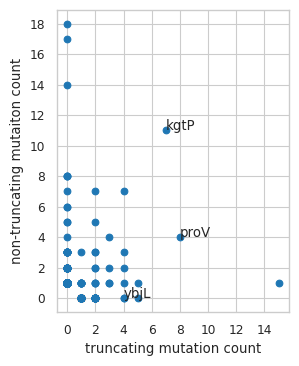

In [53]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
sns.set_context("paper")
sns.set_style('whitegrid')

trunc_cnt_df = pd.DataFrame(columns=['truncating mutation count', 'non-truncating mutation count'])
for g, gdf in mut_trunc_df.groupby('Gene'):
    trunc_cnt = len(gdf[gdf.truncation])
    non_trunc_cnt = len(gdf[gdf.truncation==False])
    srs = pd.Series({'truncating mutation count':trunc_cnt, 'non-truncating mutation count': non_trunc_cnt}, name=g)
    trunc_cnt_df = pd.concat([trunc_cnt_df, pd.DataFrame(srs).T])
trunc_cnt_df.head()

plt.figure(
    dpi=100,
    figsize=(3,4)
)
plt.scatter(trunc_cnt_df['truncating mutation count'], trunc_cnt_df['non-truncating mutation count'])

ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.xlabel("truncating mutation count")
plt.ylabel("non-truncating mutaiton count")

genes_of_interest = ['kgtP', 'ybjL', 'proV']
df = trunc_cnt_df[trunc_cnt_df.index.isin(genes_of_interest)]
for g, coords in df.iterrows():
    plt.text(coords[0], coords[1], g)